# ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram, 
    plot_pie_chart,
    visualize_image,
    plot_bar,
    plot_histogram_by_group,
    plot_scatter_size_coded
    )
from calcium_activity_characterization.io.csv_loader import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals

sns.set(style="whitegrid")

In [2]:
# Define paths to control datasets
control_paths = {
    "20250326 - IS1": "D:/Mateo/20250326/Output/IS3"
}

In [3]:
# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")
communications = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/communications.csv")
cellmotion = load_and_merge_datasets(control_paths=control_paths, file_name="cell-motion/metrics_cellmotion.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Mateo/20250326/Output/IS3/datasets/peaks.csv'

## POPULATION

### Binary & Heatmap Raster Plot

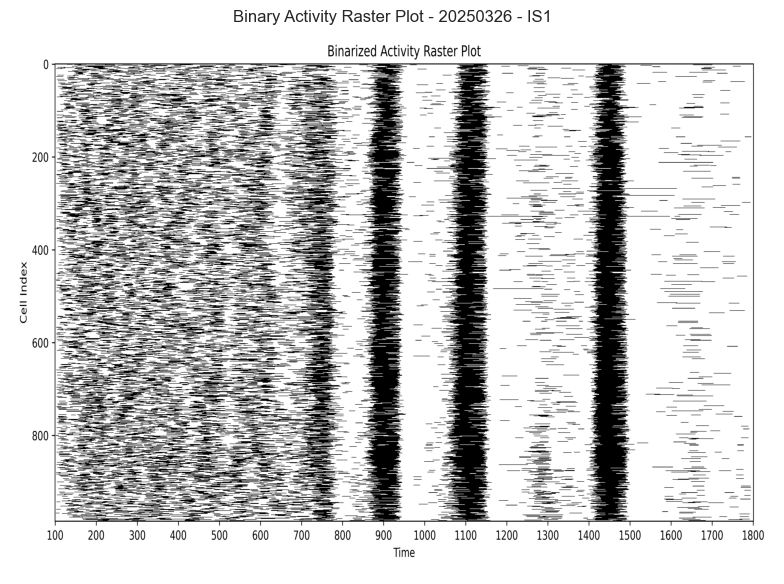

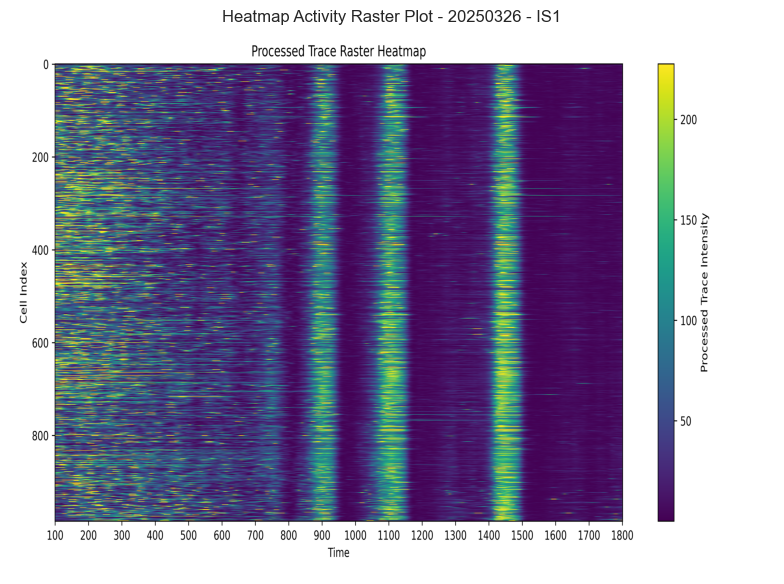

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    figsize=(8, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    figsize=(8, 6)
)

### Peaks population

In [ ]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 12215
Total number of cells: 985


### Peaks statistics

[2025-08-13 14:10:31] [INFO] calcium: plot_histogram: removed 21 outliers out of 12215 on 'Duration (s)' (lower=-73, upper=144)


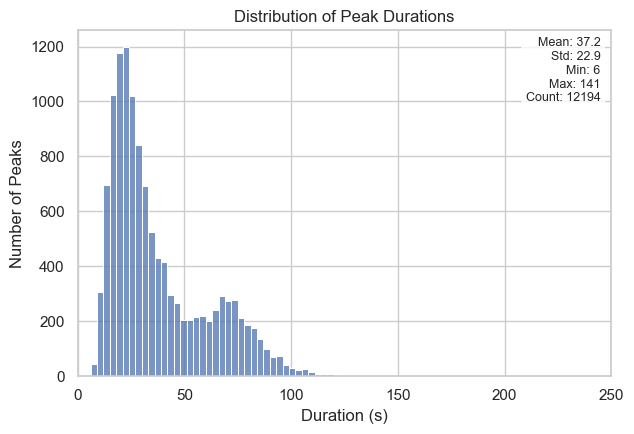

[2025-08-13 14:10:31] [INFO] calcium: plot_histogram: removed 33 outliers out of 12215 on 'Prominence (noise std units)' (lower=-318.8, upper=504.4)


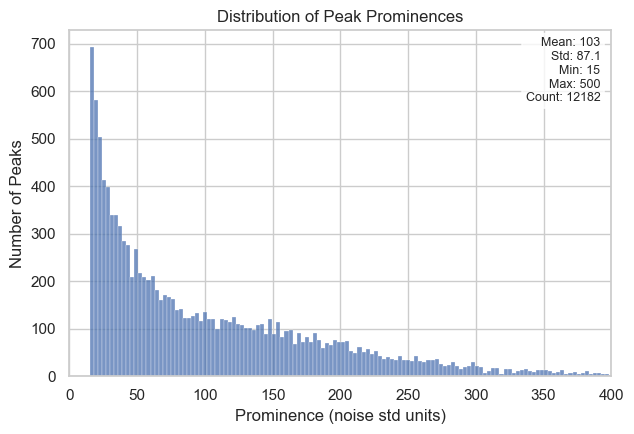

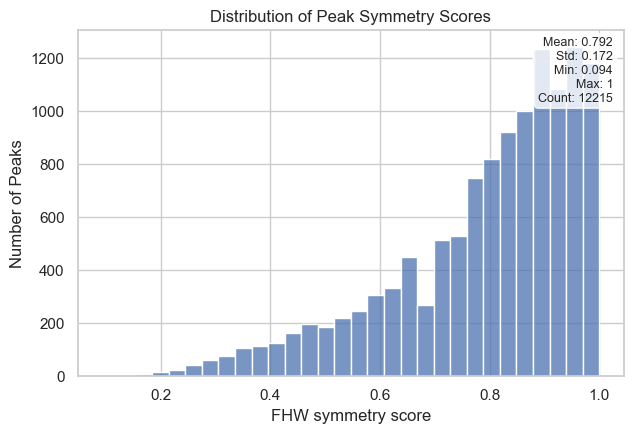

In [ ]:
plot_histogram(
    df=peaks,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Distribution of peaks per event types

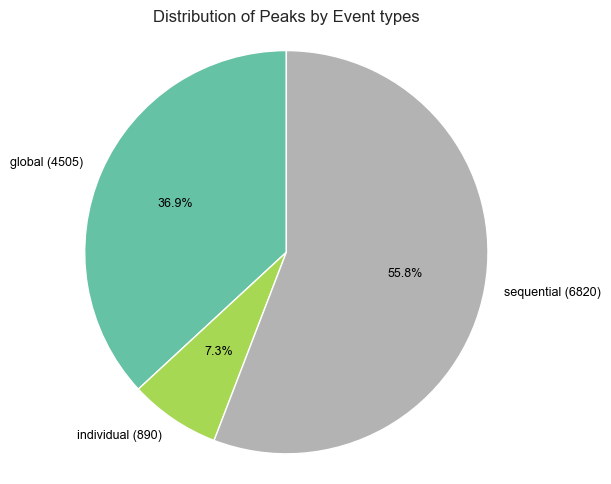

In [ ]:
plot_pie_chart(
    df=peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    palette="Set2"
)

### Peaks statistics per event types

[2025-08-13 14:10:32] [INFO] calcium: plot_histogram_by_group: removed 21 outliers out of 12215 on 'Duration (s)' (lower=-73, upper=144)


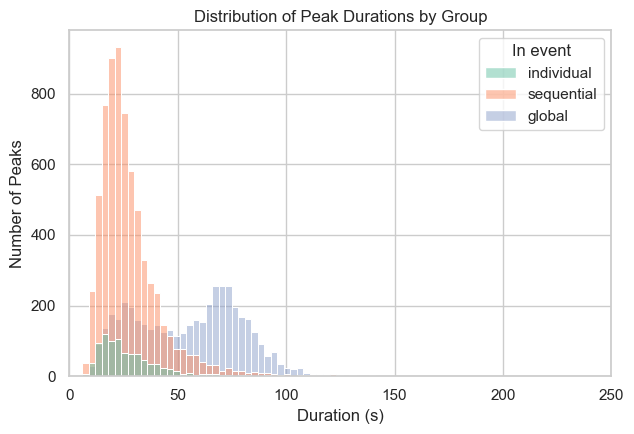

[2025-08-13 14:10:32] [INFO] calcium: plot_histogram_by_group: removed 33 outliers out of 12215 on 'Prominence (noise std units)' (lower=-318.8, upper=504.4)


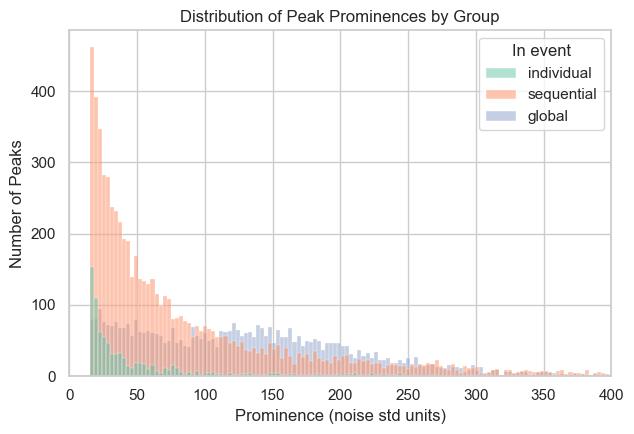

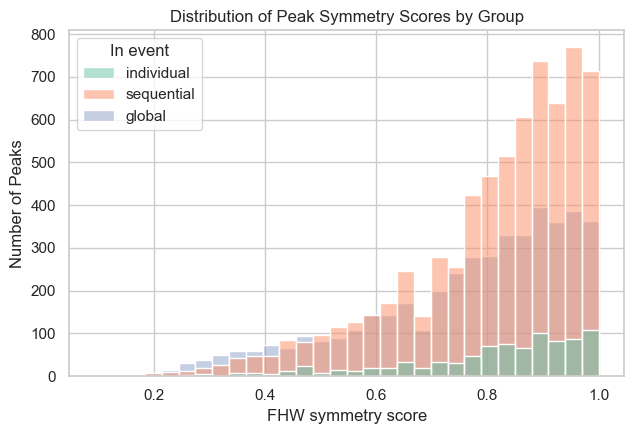

In [ ]:
peaks["In event"] = peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks,
    value_column="FHW symmetry score",
    group_column="In event",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

## GLOBAL EVENTS

### Peak statistics in global events

[2025-08-13 14:10:33] [INFO] calcium: plot_histogram: removed 1 outliers out of 4505 on 'Duration (s)' (lower=-91, upper=196)


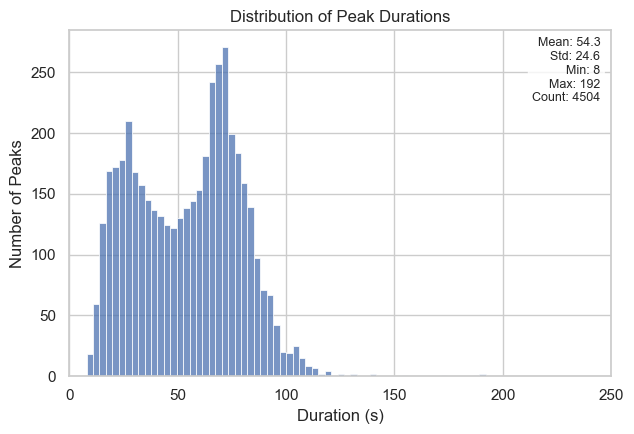

[2025-08-13 14:10:33] [INFO] calcium: plot_histogram: removed 0 outliers out of 4505 on 'Prominence (noise std units)' (lower=-297.8, upper=542.2)


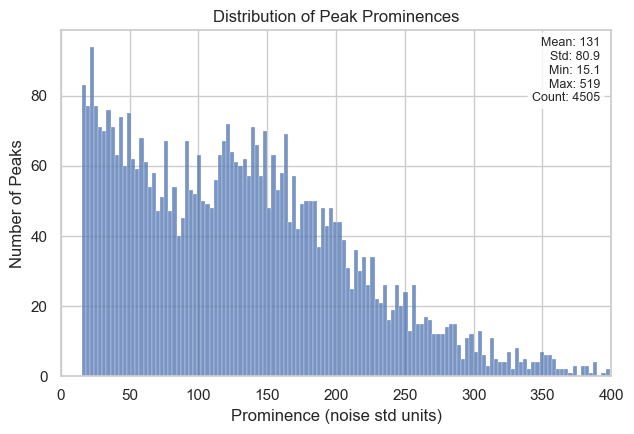

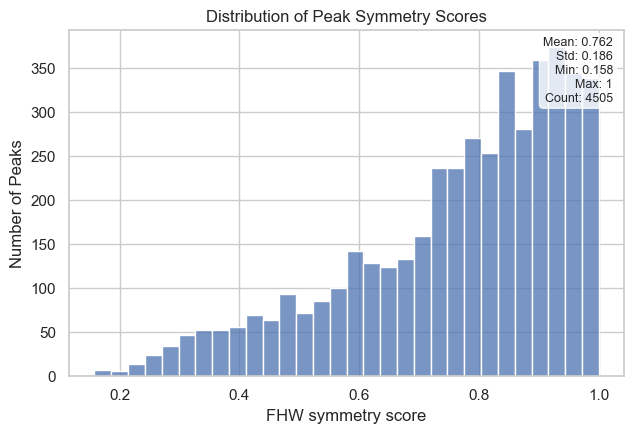

In [ ]:
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "global"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Peak statistics in global event per event ID

[2025-08-13 14:10:34] [INFO] calcium: plot_histogram_by_group: removed 1 outliers out of 4505 on 'Duration (s)' (lower=-91, upper=196)


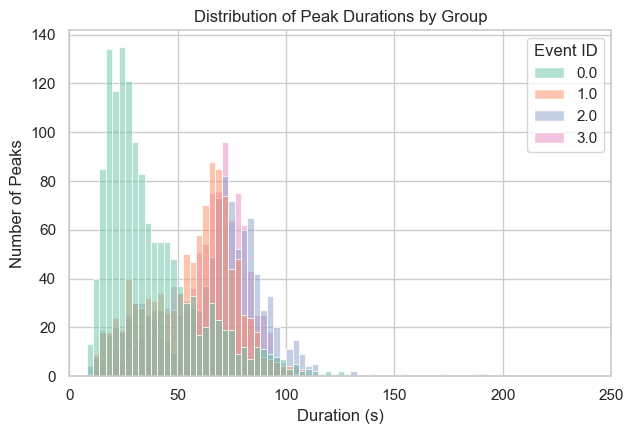

[2025-08-13 14:10:34] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 4505 on 'Prominence (noise std units)' (lower=-297.8, upper=542.2)


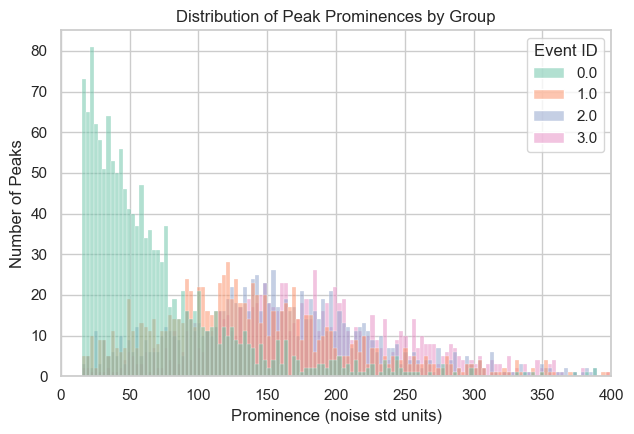

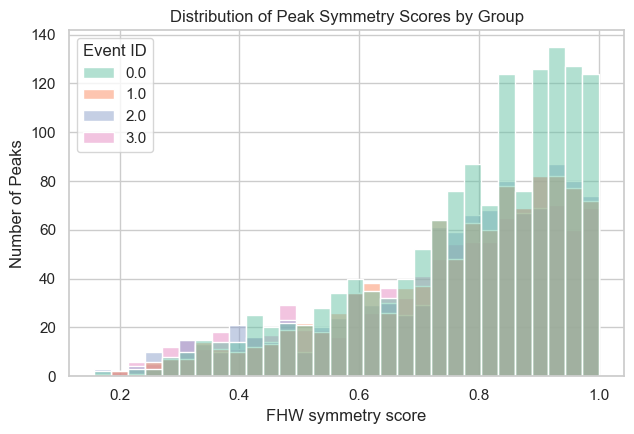

In [ ]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="FHW symmetry score",
    group_column="Event ID",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

### Kinetics of global events

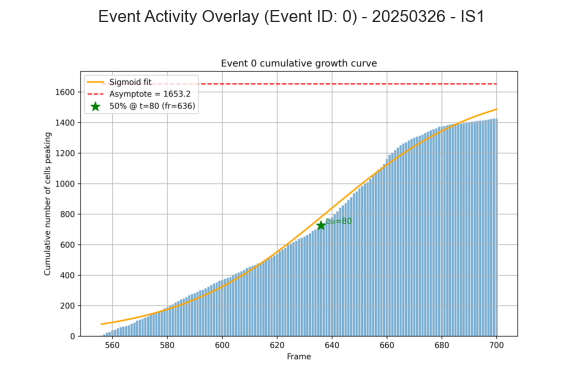

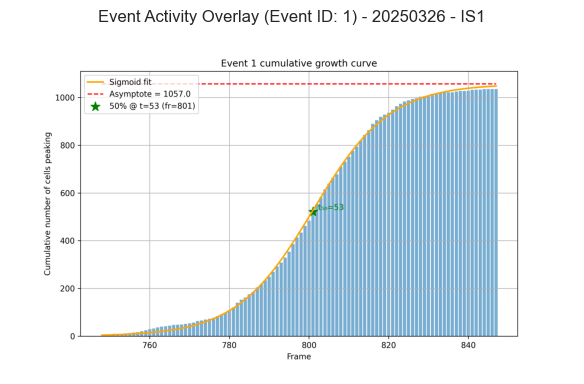

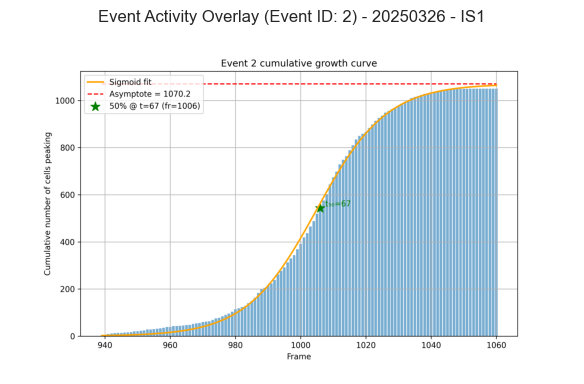

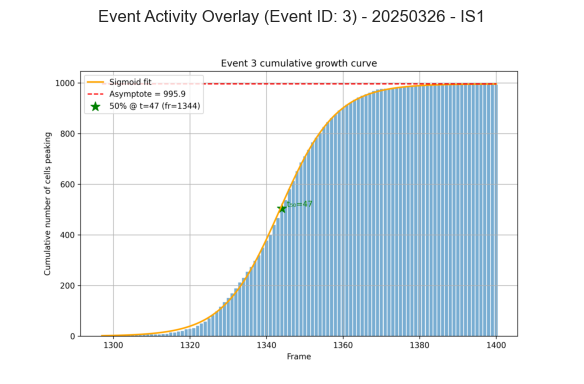

In [ ]:
global_events = events[events["Event type"] == "GlobalEvent"].copy()

for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"events/event-growth-curve-{event_id}.png",
        title=f"Event Activity Overlay (Event ID: {event_id})",
        figsize=(6, 4)
    )

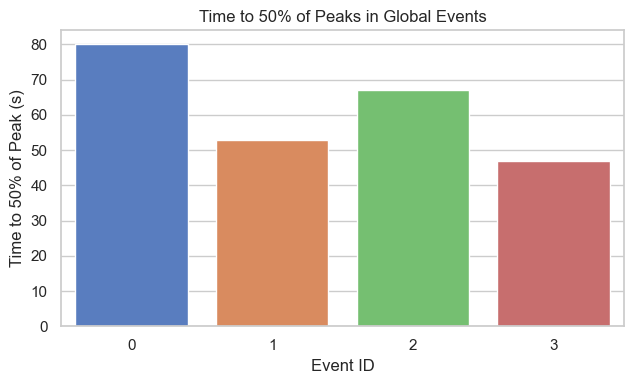

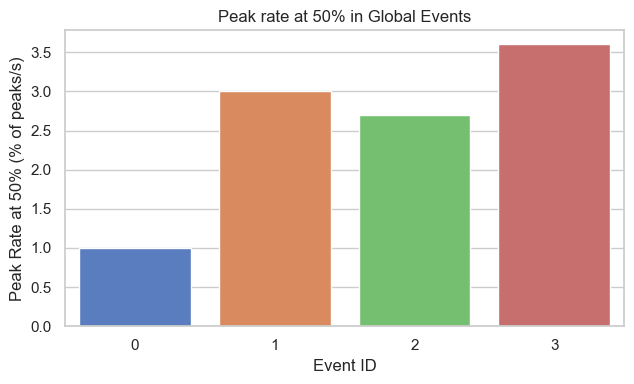

In [ ]:
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Time to 50% (s)",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)
plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="Normalized peak rate at 50% (% of peaks/s)",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (% of peaks/s)",
    xlabel="Event ID",
    rotation=0,
    palette="muted",
    hue_column=None
)

### Cells occurences in global events

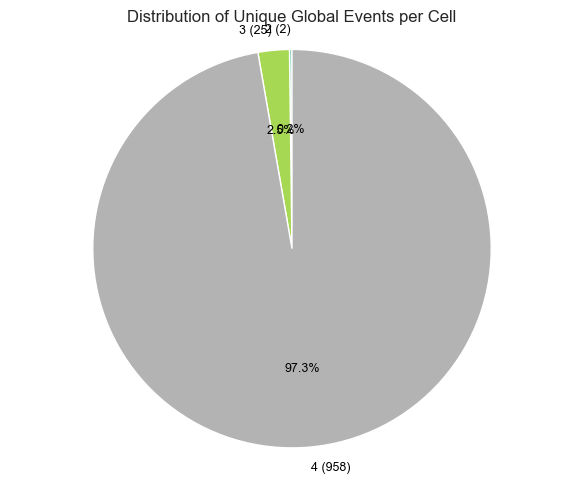

In [ ]:
plot_pie_chart(
    df=cells,
    column="Occurences in global events",
    title="Distribution of Unique Global Events per Cell",
    palette="Set2"
)

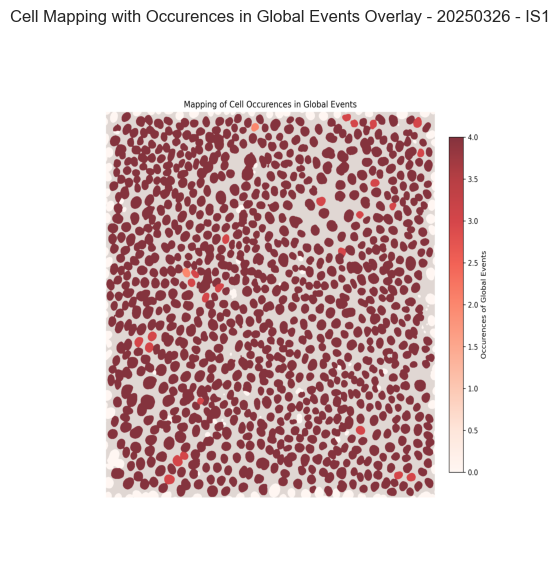

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_global_events_overlay.png",
    title="Cell Mapping with Occurences in Global Events Overlay",
    figsize=(5, 6)
)

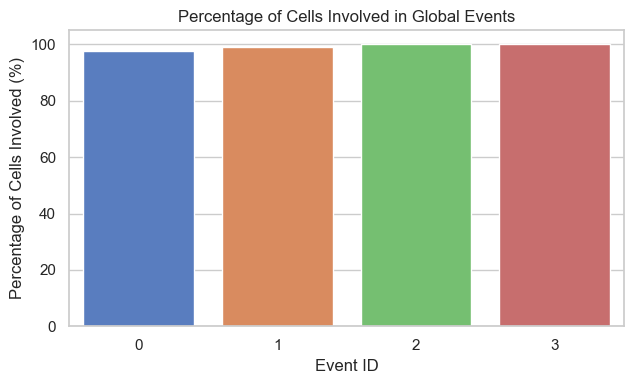

In [ ]:
global_events["% of cells involved"] = 100 * global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=global_events,
    axis_column="Event ID",
    value_column="% of cells involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

### Inter-event interval analysis

In [ ]:
intervals, periodicity, frequency = analyze_peak_intervals(events[events["Event type"] == "GlobalEvent"]["Event peak time (s)"].tolist())

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} Hz")

Intervals between global event peaks: [149.0, 205.0, 343.0]
Estimated periodicity: 0.740


### Early peakers in the events

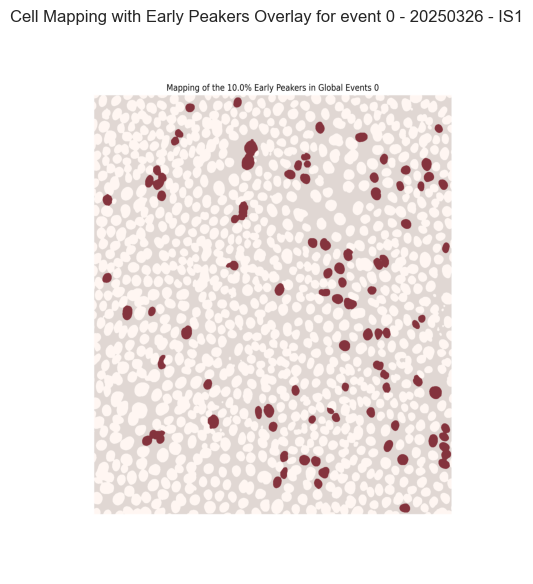

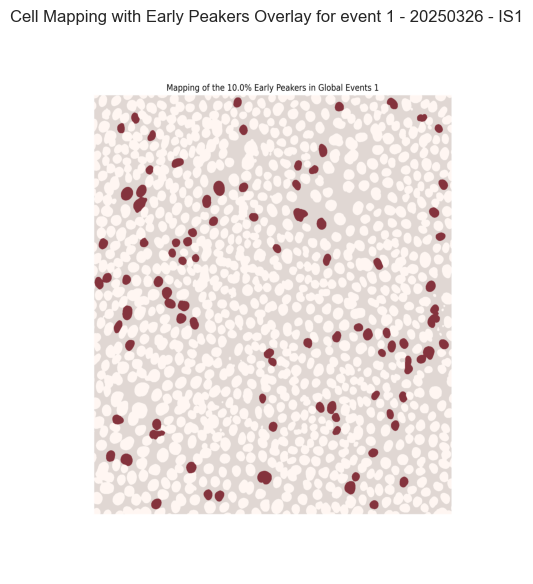

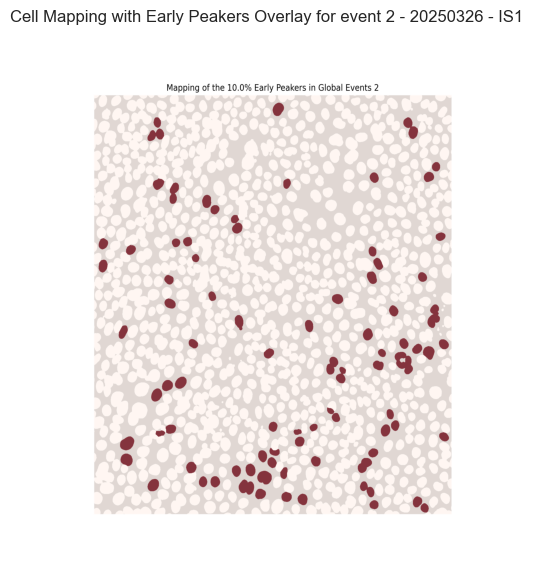

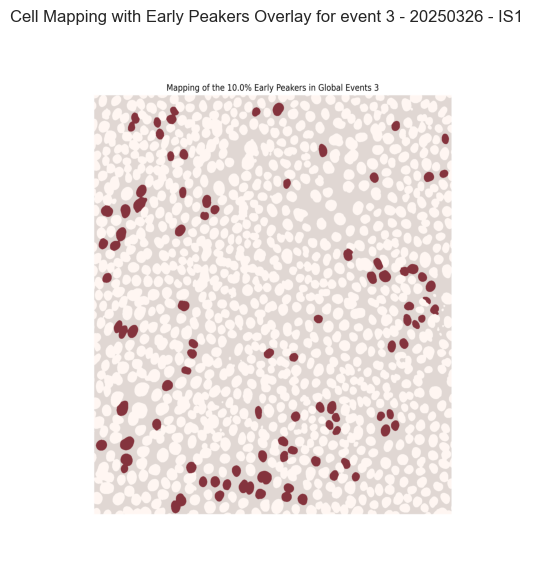

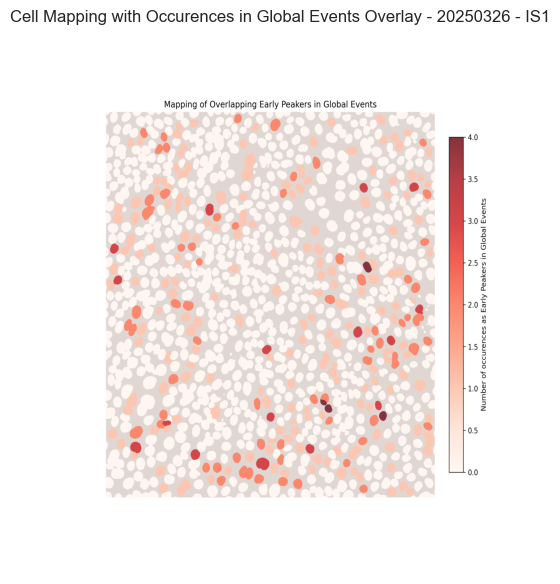

In [ ]:
for event_id in global_events["Event ID"]:
    visualize_image(
        image_source=control_paths,
        image_name=f"cell-mapping/global_events/global_event_{event_id}_early_peakers_overlay.png",
        title=f"Cell Mapping with Early Peakers Overlay for event {event_id}",
        figsize=(5, 6)
    )

visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    title="Cell Mapping with Occurences in Global Events Overlay",
    figsize=(5, 6)
)

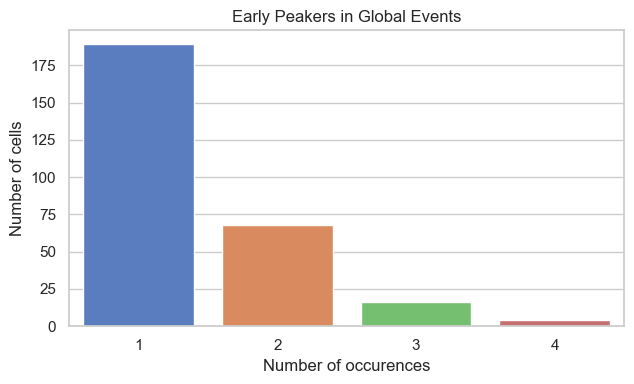

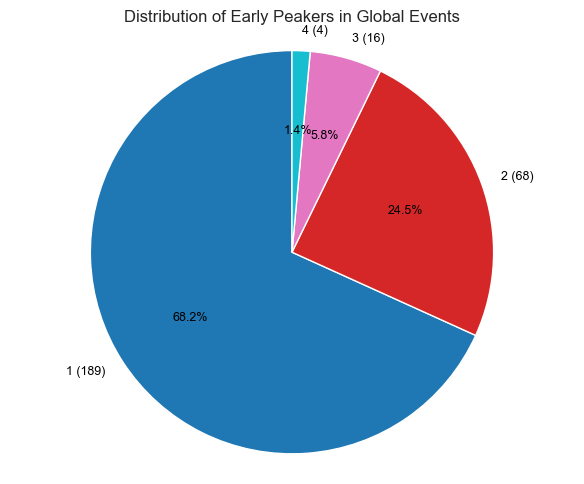

In [ ]:
early_peakers_df = (
    cells[cells["Occurences in global events as early peaker"] > 0]
      .groupby("Occurences in global events as early peaker")
      .size()
      .reset_index(name="Number of cells")
      .rename(columns={"Occurences in global events as early peaker": "Number of occurences"})
      .sort_values("Number of occurences")
)

plot_bar(
    df=early_peakers_df,
    axis_column="Number of occurences",
    value_column="Number of cells",
    title="Early Peakers in Global Events",
    xlabel="Number of occurences",
    ylabel="Number of cells",
    rotation=0
)

plot_pie_chart(
    df=cells[cells["Occurences in global events as early peaker"] > 0],
    column="Occurences in global events as early peaker",
    title="Distribution of Early Peakers in Global Events"
)

## SEQUENTIAL EVENTS

### Cells occurences in sequencial events

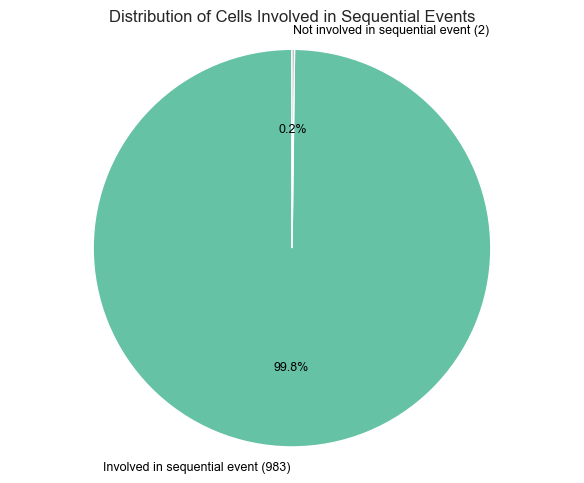

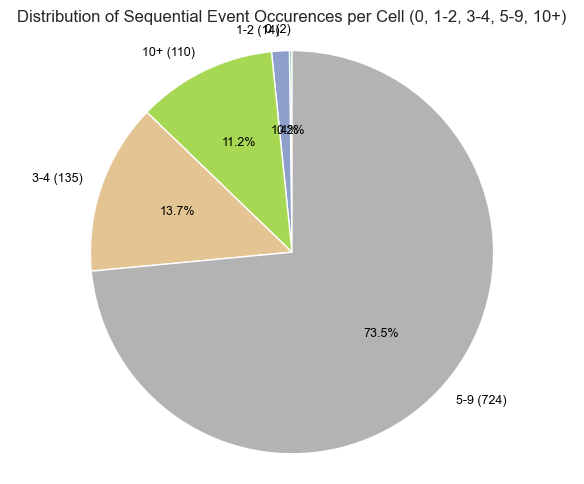

In [ ]:
cells["Involved in sequential event"] = cells["Occurences in sequential events"].apply(lambda x: "Involved in sequential event" if x > 0 else "Not involved in sequential event")

plot_pie_chart(
    df=cells,
    column="Involved in sequential event",
    title="Distribution of Cells Involved in Sequential Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1 or n == 2:
        return "1-2"
    elif n == 3 or n == 4:
        return "3-4"
    elif n < 10:
        return "5-9"
    else:
        return "10+"

cells["Occurences in sequential events category"] = cells["Occurences in sequential events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurences in sequential events category",
    title="Distribution of Sequential Event Occurences per Cell (0, 1-2, 3-4, 5-9, 10+)",
    palette="Set2"
)

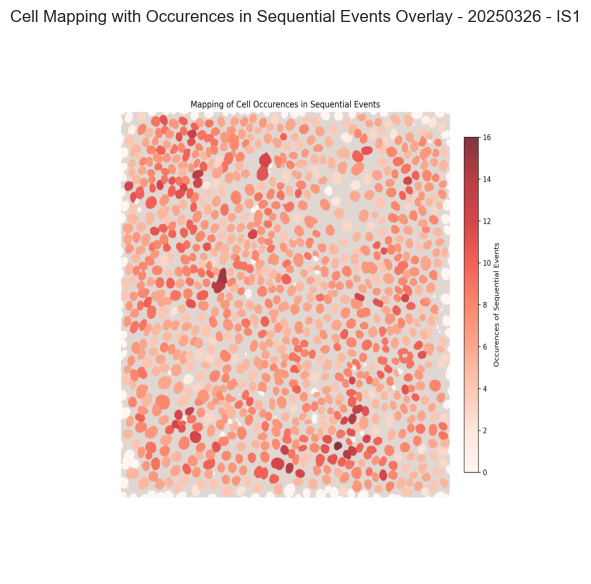

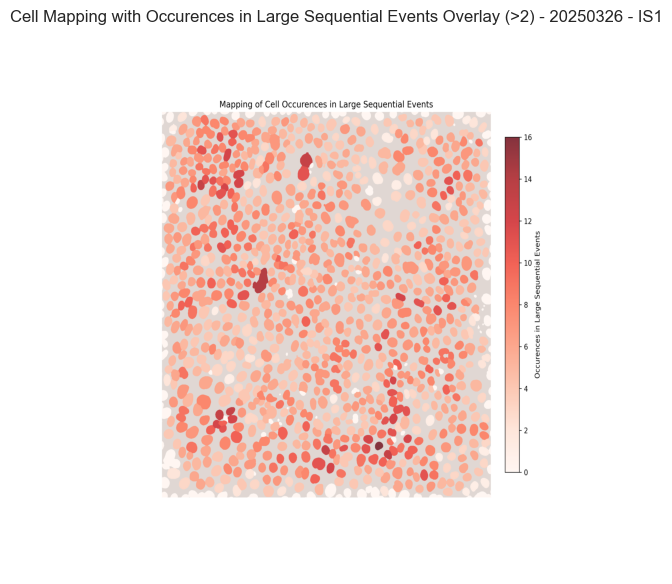

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_sequential_events_overlay.png",
    title="Cell Mapping with Occurences in Sequential Events Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_large_sequential_events_overlay.png",
    title="Cell Mapping with Occurences in Large Sequential Events Overlay (>2)",
    figsize=(5, 6)
)

### Peaks statistics in sequential events

[2025-08-13 14:10:52] [INFO] calcium: plot_histogram: removed 93 outliers out of 6820 on 'Duration (s)' (lower=-3, upper=81)


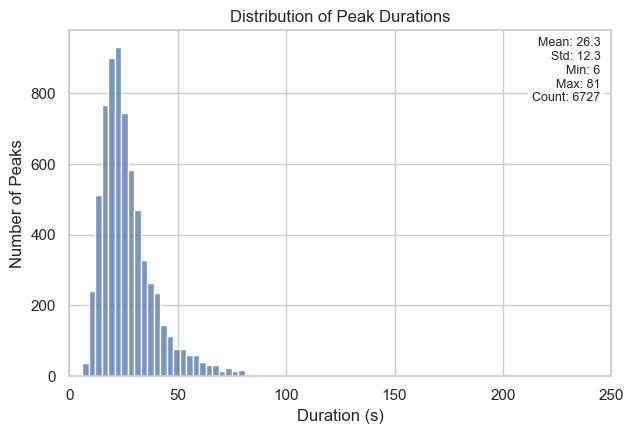

[2025-08-13 14:10:52] [INFO] calcium: plot_histogram: removed 71 outliers out of 6820 on 'Prominence (noise std units)' (lower=-106.9, upper=437.9)


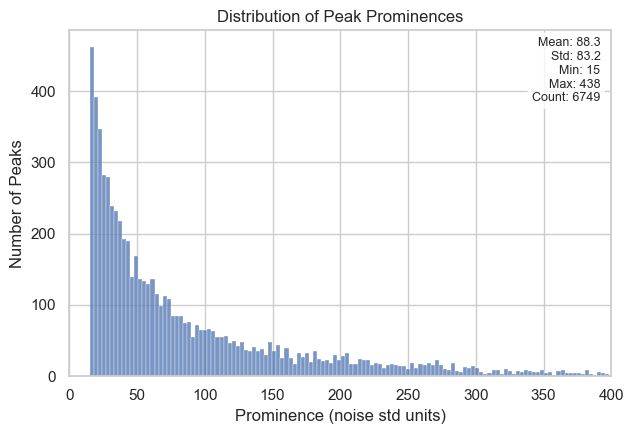

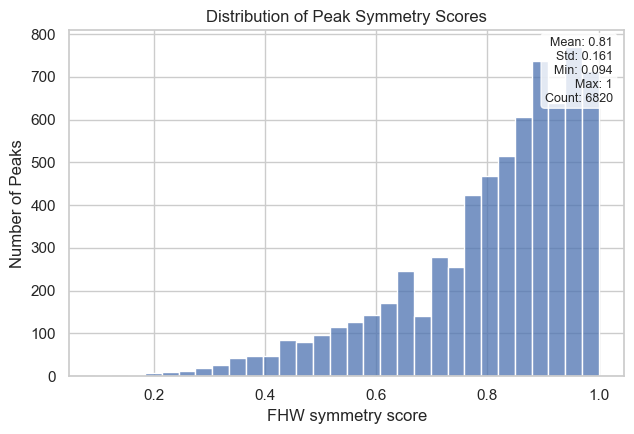

In [ ]:
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "sequential"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Cell-cell communication speed

[2025-08-13 14:13:05] [INFO] calcium: plot_histogram: removed 8 outliers out of 1263 on 'Average communication speed (um/s)' (lower=-9.65, upper=17.79)


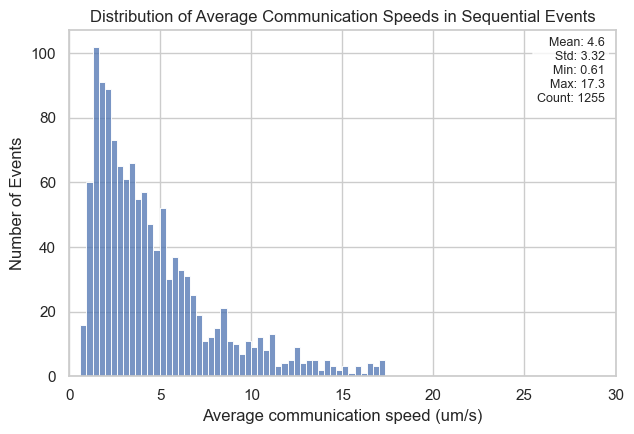

[2025-08-13 14:13:05] [INFO] calcium: plot_histogram: removed 29 outliers out of 5557 on 'Speed (um/s)' (lower=-9.43, upper=23.15)


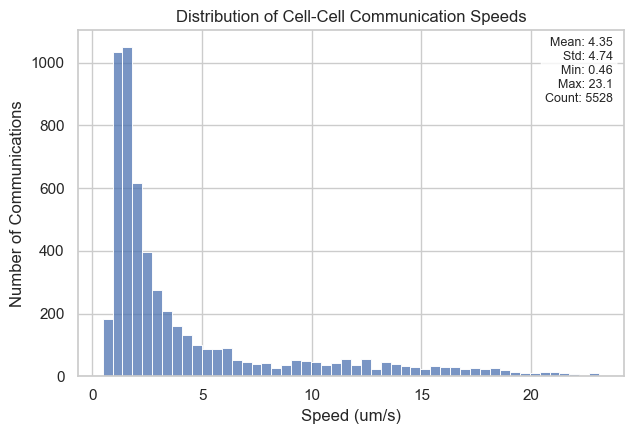

In [ ]:
sequential_events = events[events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=sequential_events,
    column="Average communication speed (um/s)",
    title="Distribution of Average Communication Speeds in Sequential Events",
    ylabel="Number of Events",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram(
    df=communications,
    column="Speed (um/s)",
    title="Distribution of Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    return_outliers=False,
)

### Double distribution in cell-cell communication speeds

In [ ]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "2"
    elif n == 3:
        return "3"
    elif n == 4:
        return "4"
    elif 5 <= n <= 10:
        return "5-10"
    else:
        return "11+"

sequential_events["Number of cells involved category"] = sequential_events["Number of cells involved"].apply(seq_events_category)

# Assign 'Number of cells involved category' to peaks based on their sequential event
peaks.loc[peaks["In event"] == "sequential", "Number of cells involved category"] = (
    peaks.loc[peaks["In event"] == "sequential", "Event ID"]
    .map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

# Assign 'Number of cells involved category' to communications based on their Event ID
communications["Number of cells involved category"] = (
    communications["Event ID"].map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

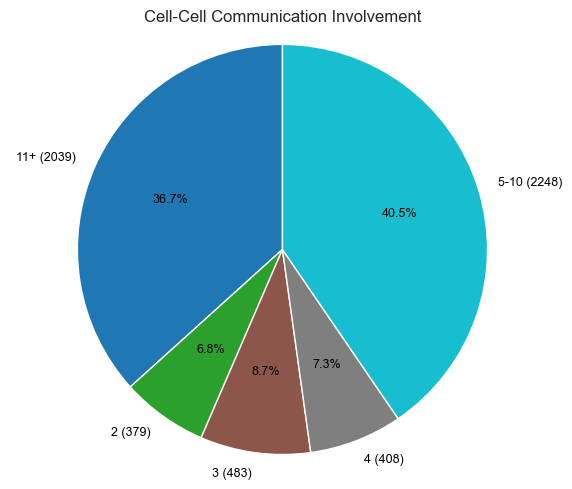

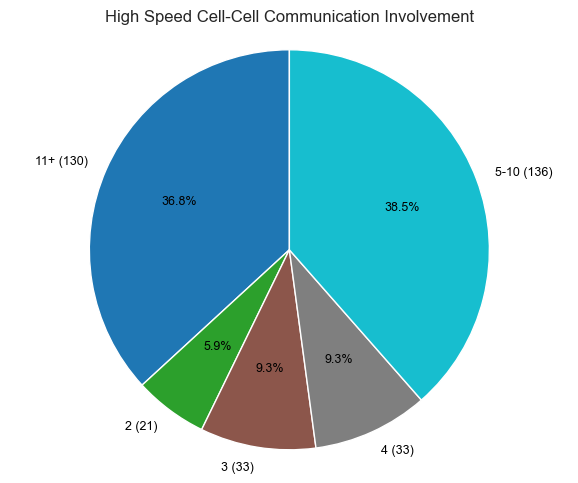

In [ ]:
communications["Speed category"] = communications["Speed (um/s)"].apply(lambda x: "High speed" if x > 15 else "Low speed")
plot_pie_chart(
    df=communications,
    column="Number of cells involved category",
    title="Cell-Cell Communication Involvement"
)
plot_pie_chart(
    df=communications[communications["Speed category"] == "High speed"],
    column="Number of cells involved category",
    title="High Speed Cell-Cell Communication Involvement"
)

[2025-08-13 14:16:50] [INFO] calcium: plot_histogram: removed 2 outliers out of 353 on 'Speed (um/s)' (lower=4.52, upper=32.24)


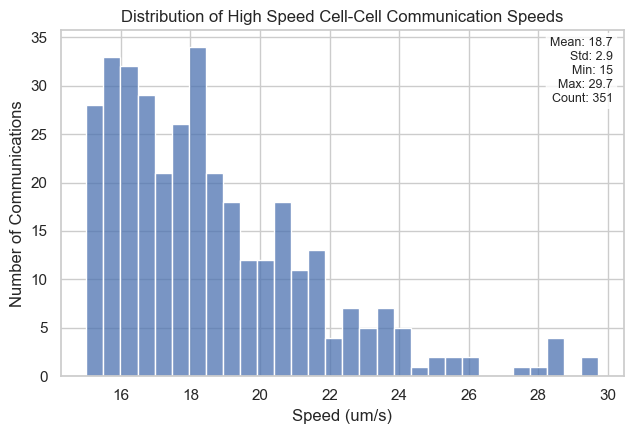

[2025-08-13 14:16:50] [INFO] calcium: plot_histogram_by_group: removed 2 outliers out of 353 on 'Speed (um/s)' (lower=4.52, upper=32.24)


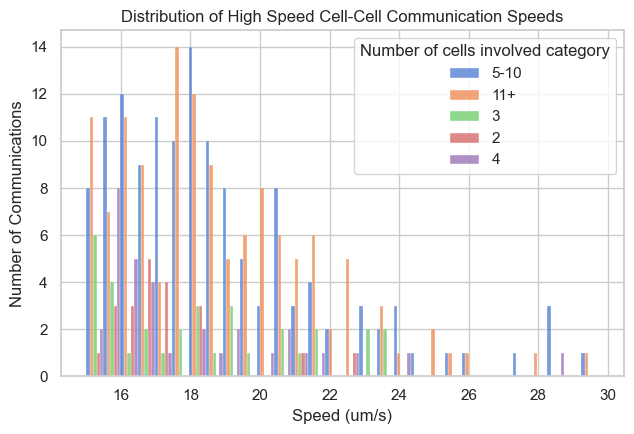

In [ ]:
plot_histogram(
    df=communications[communications["Speed category"] == "High speed"],
    column="Speed (um/s)",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=30,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    multiple="dodge"
)

[2025-08-13 14:10:54] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 332 on 'Event time phase (fraction of event duration)' (lower=-1.9675, upper=2.81)


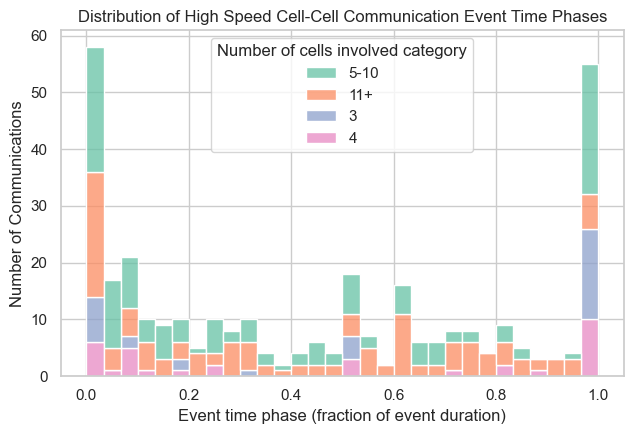

[2025-08-13 14:10:54] [INFO] calcium: plot_histogram_by_group: removed 0 outliers out of 332 on 'Event recruitment phase (fraction of involved cells)' (lower=-1.5, upper=2)


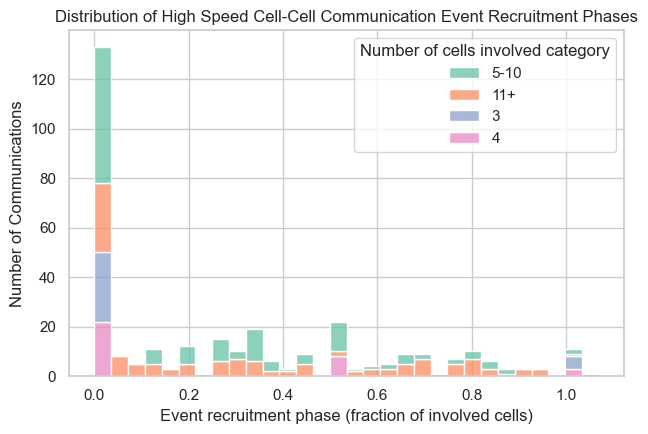

In [ ]:
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event time phase (fraction of event duration)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Time Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None
)
plot_histogram_by_group(
    df=communications[communications["Speed category"] == "High speed"],
    value_column="Event recruitment phase (fraction of involved cells)",
    group_column="Number of cells involved category",
    title="Distribution of High Speed Cell-Cell Communication Event Recruitment Phases",
    ylabel="Number of Communications",
    bin_count=30,
    palette="Set2",
    multiple="stack",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=None,
    y_axis_boundaries=None,
)

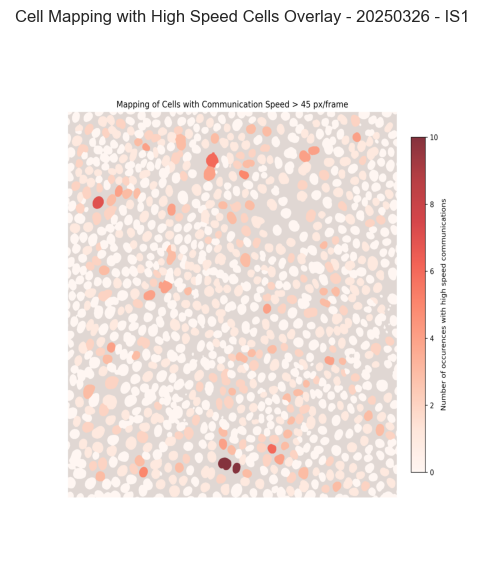

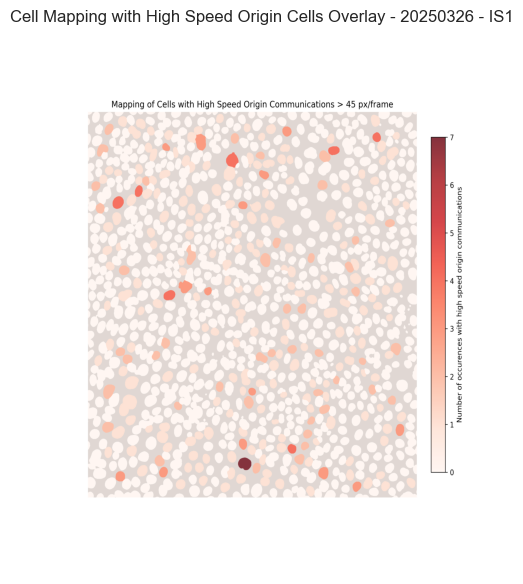

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_cells_overlay.png",
    title="Cell Mapping with High Speed Cells Overlay",
    figsize=(5, 6)
)
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/high_speed_origin_cells_overlay.png",
    title="Cell Mapping with High Speed Origin Cells Overlay",
    figsize=(5, 6)
)

Communication ID  Event ID  Origin cell ID  Origin cell peak ID  \
0        1759456165648         4             928                    1   
5        1759456165024         5            1436                    3   
6        1759456160368         5            1436                    3   
25       1759508166592         9             558                    5   
41       1759364411312        10             908                    7   
...                ...       ...             ...                  ...   
5488     1759523234688      1221            1555                   11   
5494     1759456359616      1222            1631                    4   
5506     1759523232912      1232            1617                    1   
5522     1759523226048      1242            1631                    2   
5539     1759523230848      1252            1642                    0   

      Cause cell ID  Cause cell peak ID  Start time (s)  End time (s)  \
0               927                   1           181.0         182.0   
5              1425                   5           309.0         310.0   
6              1463                   3           309.0         310.0   
25              599                   3           304.0         304.0   
41              861                   6           419.0         419.0   
...             ...                 ...             ...           ...   
5488           1570                  13           932.0         933.0   
5494           1636                   3           343.0         344.0   
5506           1585                   1           154.0         155.0   
5522           1596                   3           181.0         182.0   
5539           1603                   1           134.0         135.0   

      Duration (s)  Distance (um)  Speed (um/s)  \
0              1.0          18.53         18.53   
5              1.0          16.03         16.03   
6              1.0          17.16         17.16   
25             0.0          17.76         17.76   
41             0.0          20.41         20.41   
...            ...            ...           ...   
5488           1.0          18.40         18.40   
5494           1.0          17.53         17.53   
5506           1.0          17.31         17.31   
5522           1.0          15.32         15.32   
5539           1.0          17.34         17.34   

      Event time phase (fraction of event duration)  \
0                                              0.04   
5                                              0.25   
6                                              0.25   
25                                             0.05   
41                                             0.76   
...                                             ...   
5488                                            NaN   
5494                                           0.53   
5506                                            NaN   
5522                                           0.50   
5539                                            NaN   

      Event recruitment phase (fraction of involved cells)         dataset  \
0                                                  0.00     20250326 - IS1   
5                                                  0.00     20250326 - IS1   
6                                                  0.00     20250326 - IS1   
25                                                 0.00     20250326 - IS1   
41                                                 0.71     20250326 - IS1   
...                                                 ...                ...   
5488                                                NaN     20250326 - IS1   
5494                                               0.40     20250326 - IS1   
5506                                                NaN     20250326 - IS1   
5522                                               0.00     20250326 - IS1   
5539                                                NaN     20250326 - IS1   

     Number of cells involved category Sp

Speed category  High speed  Low speed
Origin cell ID                       
263                      0          1
266                      0          3
267                      1          5
269                      0          2
270                      0          1
...                    ...        ...
1643                     0          1
1644                     0          1
1645                     0          1
1649                     0          1
1650                     0          2

[955 rows x 2 columns]

Cell ID  Centroid X coordinate (um)  Centroid Y coordinate (um)  \
0        263                       30.23                        6.17   
1        266                      364.98                        6.83   
2        267                      199.88                        8.45   
3        269                      233.35                        9.10   
4        270                      279.50                       10.08   
..       ...                         ...                         ...   
980     1643                      113.10                      490.43   
981     1644                      161.53                      490.75   
982     1645                      181.35                      490.75   
983     1649                      461.50                      491.40   
984     1650                      433.88                      491.73   

     Number of peaks  Is active  Occurences in global events  \
0                 11       True                            4   
1                 11       True                            3   
2                 13       True                            4   
3                  9       True                            4   
4                 11       True                            4   
..               ...        ...                          ...   
980                6       True                            4   
981               17       True                            4   
982                9       True                            4   
983               11       True                            4   
984               14       True                            4   

     Occurences in global events as early peaker  \
0                                              0   
1                                              0   
2                                              2   
3                                              0   
4                                              0   
..                                           ...   
980                                            1   
981                                            0   
982                                            0   
983                                            1   
984                                            1   

     Occurences in sequential events  \
0                                  3   
1                                  6   
2                                  6   
3                                  3   
4                                  4   
..                               ...   
980                                2   
981                                4   
982                                2   
983                                2   
984                                4   

     Occurences in sequential events as origin  \
0                                            1   
1                                            2   
2                                            1   
3                                            0   
4                                            1   
..                                         ...   
980                                          1   
981                                          0   
982                                          1   
983                                          0   
984                                          1   

     Occurences in individual events  Peak frequency (Hz)  Periodicity score  \
0                                  4               0.0065               0.67   
1                                  2               0.0065               0.57   
2                                  2               0.0076               0.62   
3                                  2               0.0053               0.65   
4                                  3               0.0065               0.71   
..                               ...                  ...                ...   
980                                0               0.0035               0.72   
981                     

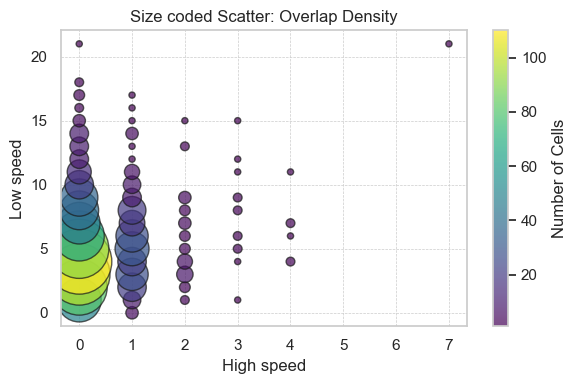

In [ ]:
display(communications[communications["Speed category"] == "High speed"])

counts = (
    communications
    .groupby(["Origin cell ID", "Speed category"], dropna=False)
    .size()
    .unstack("Speed category", fill_value=0)
)
display(counts)
out = cells.copy()
out = out.merge(
    counts,
    left_on="Cell ID",
    right_index=True,
    how="left"
).dropna()
display(out)

plot_scatter_size_coded(
    df=out,
    x_col="High speed",
    y_col="Low speed"
)



### Number of cells involved per sequential events

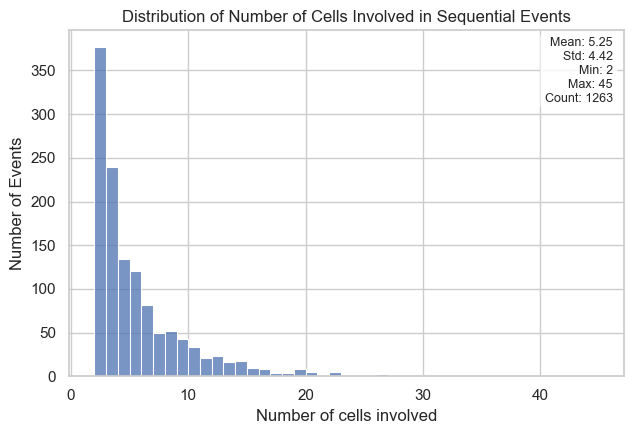

In [ ]:
plot_histogram(
    df=sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

### Influence of cell count per event on statistics

[2025-08-13 14:10:57] [INFO] calcium: plot_histogram_by_group: removed 93 outliers out of 6820 on 'Duration (s)' (lower=-3, upper=81)


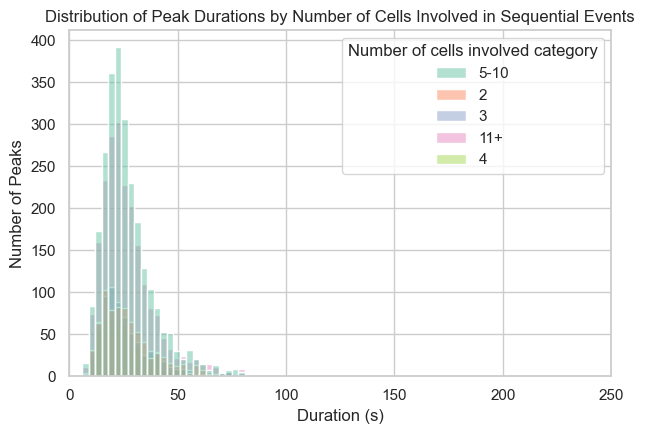

[2025-08-13 14:10:57] [INFO] calcium: plot_histogram_by_group: removed 71 outliers out of 6820 on 'Prominence (noise std units)' (lower=-106.9, upper=437.9)


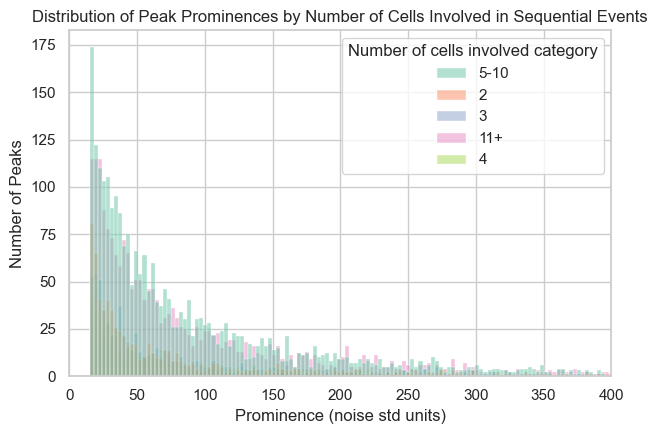

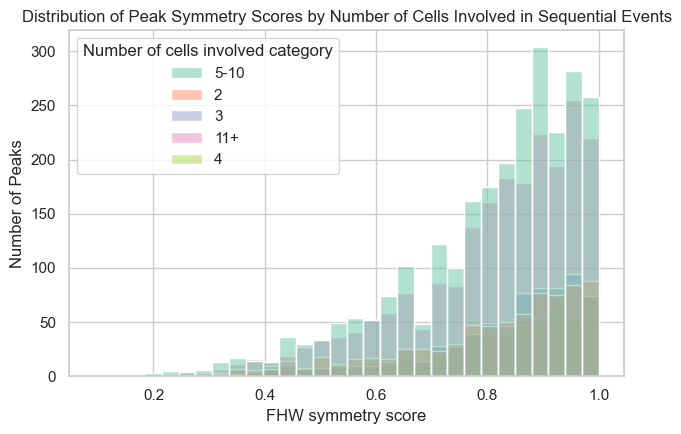

In [ ]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(1.5, 3.5),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="Number of cells involved category",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    multiple="layer",
    palette="Set2"
)

[2025-08-13 14:10:58] [INFO] calcium: plot_histogram_by_group: removed 8 outliers out of 1263 on 'Average communication speed (um/s)' (lower=-9.65, upper=17.79)


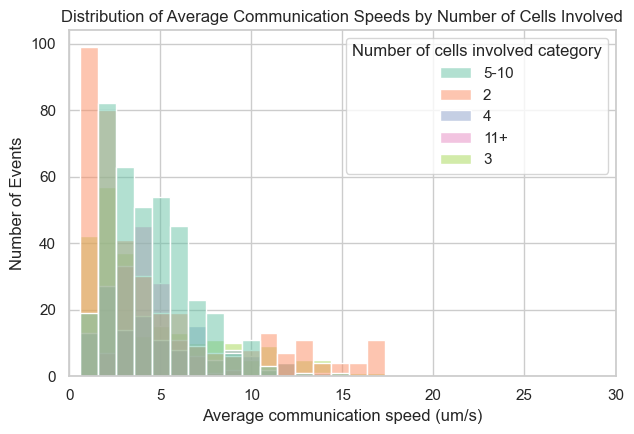

[2025-08-13 14:10:59] [INFO] calcium: plot_histogram_by_group: removed 298 outliers out of 5557 on 'Speed (um/s)' (lower=-9.43, upper=15.91)


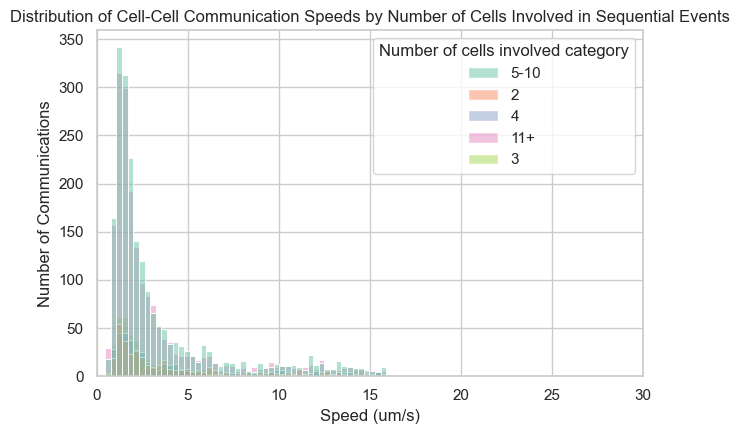

In [ ]:
plot_histogram_by_group(
    df=sequential_events,
    value_column="Average communication speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Average Communication Speeds by Number of Cells Involved",
    ylabel="Number of Events",
    bin_width=1,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Cell-Cell Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_count=50,
    multiple="layer",
    palette="Set2",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 30)
)

### Cells occurences as origin in sequential events

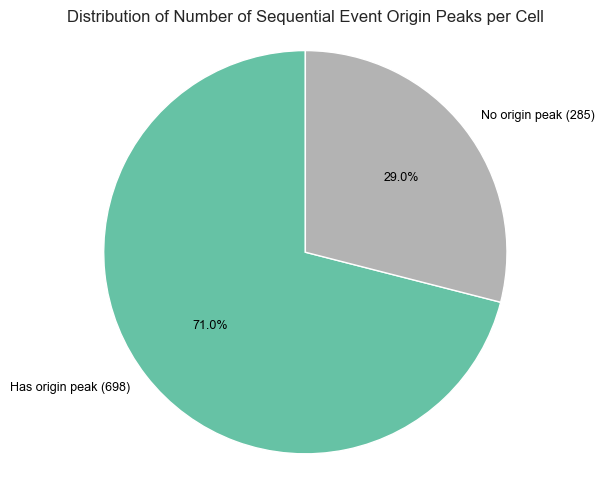

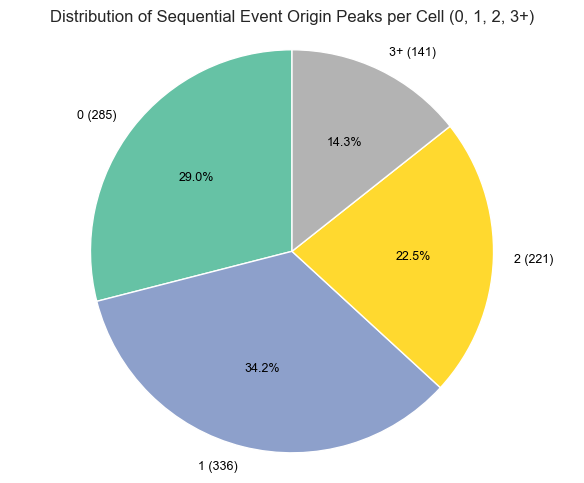

In [ ]:
cells["Has origin peak"] = cells["Occurences in sequential events as origin"].apply(lambda x: "Has origin peak" if x > 0 else "No origin peak")
plot_pie_chart(
    df=cells[cells["Occurences in sequential events"] > 0],
    column="Has origin peak",
    title="Distribution of Number of Sequential Event Origin Peaks per Cell",
    palette="Set2"
)
def origin_peak_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    else:
        return "3+"

cells["Origin peak category"] = cells["Occurences in sequential events as origin"].apply(origin_peak_category)

plot_pie_chart(
    df=cells[cells["Occurences in sequential events"] > 0],
    column="Origin peak category",
    title="Distribution of Sequential Event Origin Peaks per Cell (0, 1, 2, 3+)",
    palette="Set2"
)


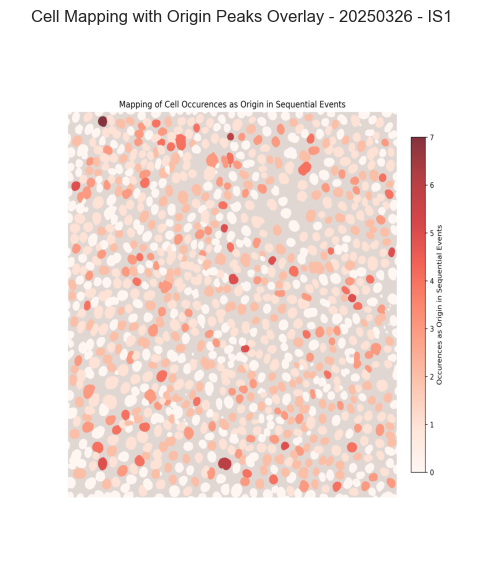

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_origin_seq_events_overlay.png",
    title="Cell Mapping with Origin Peaks Overlay",
    figsize=(5, 6)
)

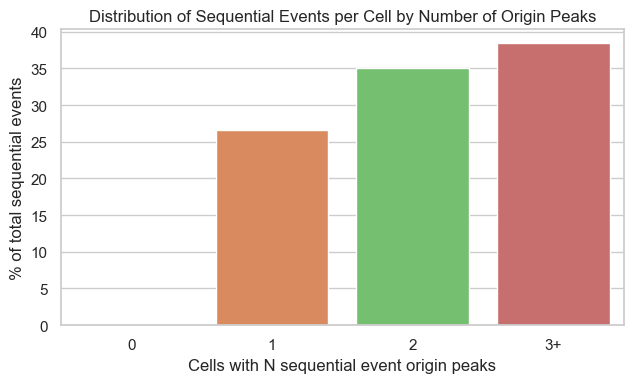

In [ ]:
# Sum the total number of sequential origin peaks for each exact value (0, 1, 2, 3, ...)
total_peaks_per_exact_value = (
    cells.groupby("Origin peak category")
    ["Occurences in sequential events as origin"]
    .sum()
    .reset_index(name="Total origin peaks")
)

# Compute normalized percentage
total_sum = total_peaks_per_exact_value["Total origin peaks"].sum()
total_peaks_per_exact_value["% of total"] = (
    total_peaks_per_exact_value["Total origin peaks"] / total_sum * 100
).round(2)

plot_bar(
    df=total_peaks_per_exact_value,
    axis_column="Origin peak category",
    value_column="% of total",
    title="Distribution of Sequential Events per Cell by Number of Origin Peaks",
    ylabel="% of total sequential events",
    xlabel="Cells with N sequential event origin peaks",
    rotation=0
)

### Connection network between cells

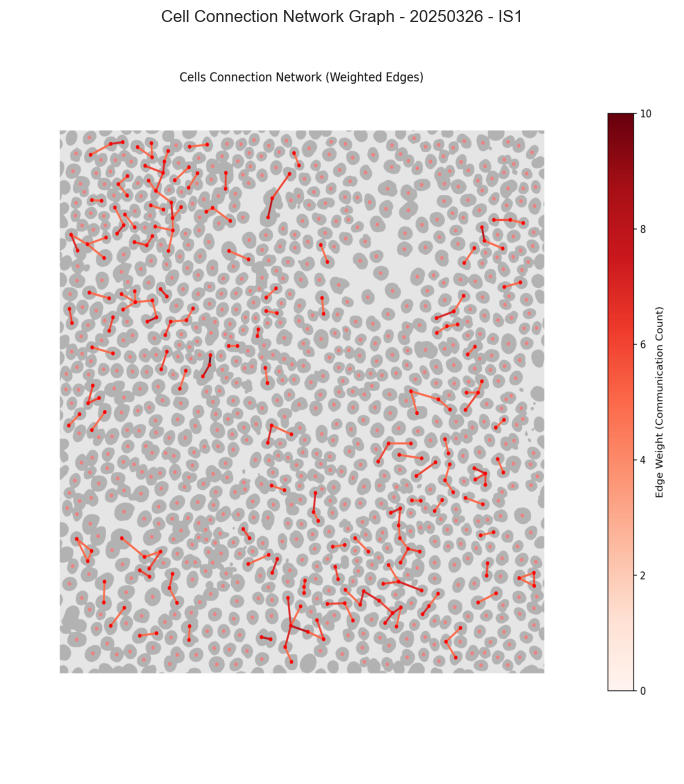

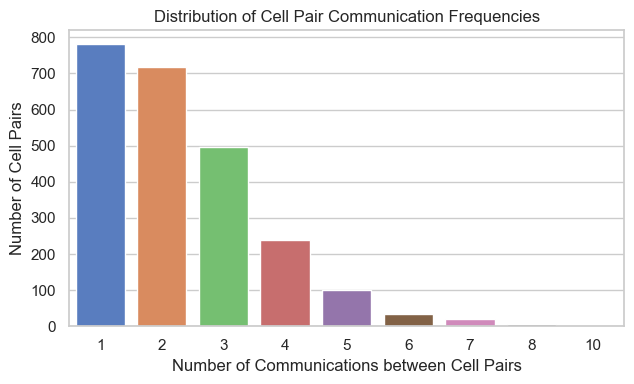

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_connection_network/cell_connection_network_95.png",
    title="Cell Connection Network Graph",
    figsize=(7, 8)
)

# Create a tuple for each cell pair (order-independent)
cell_pairs = communications.apply(
    lambda row: tuple(sorted([row["Origin cell ID"], row["Cause cell ID"]])), axis=1
)

# Count occurrences of each cell pair
pair_counts = cell_pairs.value_counts()

# Count how many pairs have each occurrence count
occurrence_distribution = pair_counts.value_counts().sort_index()

occurrence_distribution.name = "Number of Cell Pairs"
occurrence_distribution.index.name = "Number of Communications between Cell Pairs"

cells_connection_network = occurrence_distribution.reset_index()

cells_connection_network.columns = ["Number of Communications between Cell Pairs", "Number of Cell Pairs"]

plot_bar(
    df=cells_connection_network,
    axis_column="Number of Communications between Cell Pairs",
    value_column="Number of Cell Pairs",
    title="Distribution of Cell Pair Communication Frequencies",
    xlabel="Number of Communications between Cell Pairs",
    ylabel="Number of Cell Pairs",
    rotation=0
)

## INDIVIDUAL EVENTS

### Cells occurences in individual events

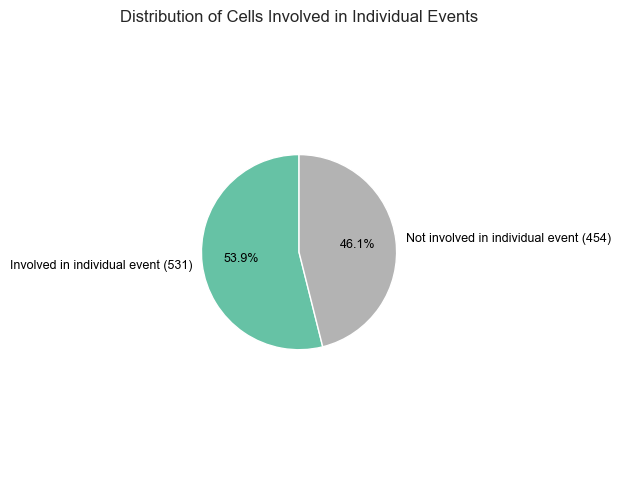

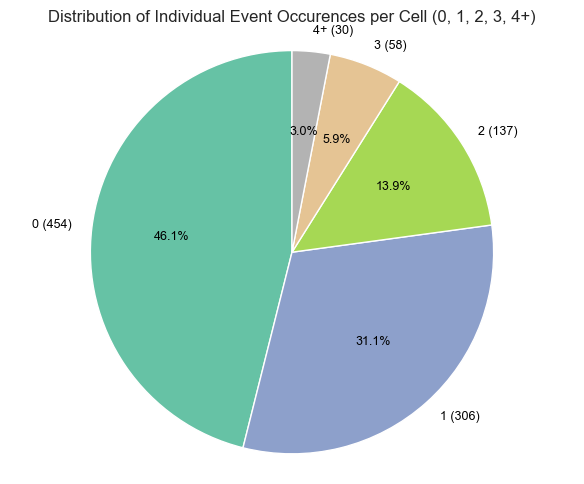

In [ ]:
cells["Involved in individual event"] = cells["Occurences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")

plot_pie_chart(
    df=cells,
    column="Involved in individual event",
    title="Distribution of Cells Involved in Individual Events",
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    elif n == 3:
        return "3"
    else:
        return "4+"

cells["Occurences in individual events category"] = cells["Occurences in individual events"].apply(cells_category)

plot_pie_chart(
    df=cells,
    column="Occurences in individual events category",
    title="Distribution of Individual Event Occurences per Cell (0, 1, 2, 3, 4+)",
    palette="Set2"
)

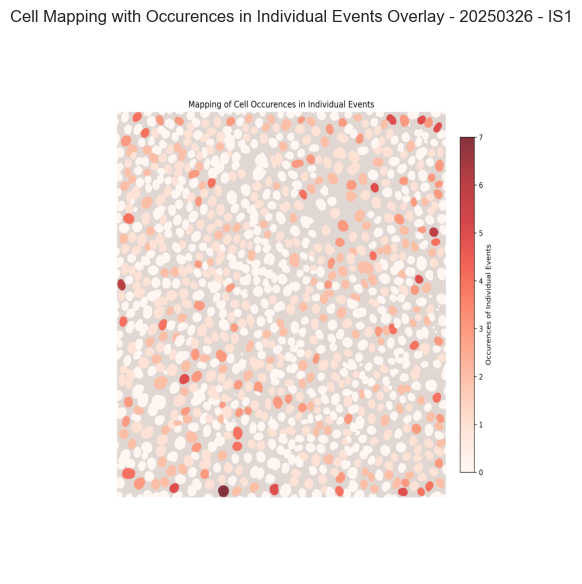

In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-mapping/cell_occurences_in_individual_events_overlay.png",
    title="Cell Mapping with Occurences in Individual Events Overlay",
    figsize=(5, 6)
)

### Peaks statistics in individual events

[2025-08-13 14:11:03] [INFO] calcium: plot_histogram: removed 16 outliers out of 890 on 'Duration (s)' (lower=-31, upper=81)


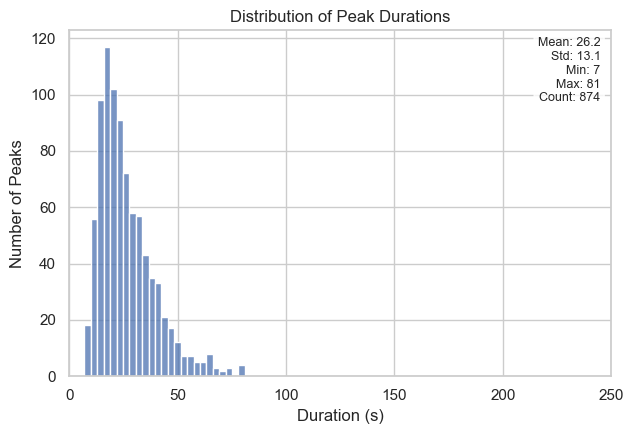

[2025-08-13 14:11:03] [INFO] calcium: plot_histogram: removed 51 outliers out of 890 on 'Prominence (noise std units)' (lower=-130.28, upper=219.9)


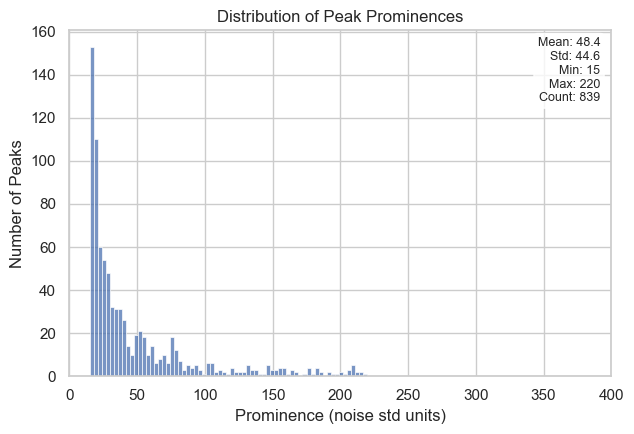

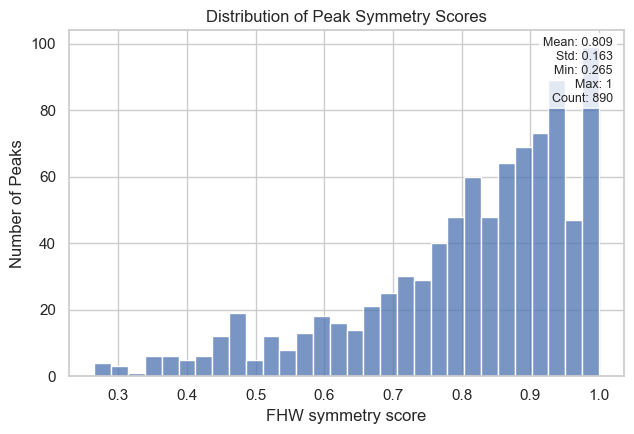

In [ ]:
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 250)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 400)
)
plot_histogram(
    df=peaks[peaks["In event"] == "individual"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30
)

### Correlation between event activity level & individual activity level

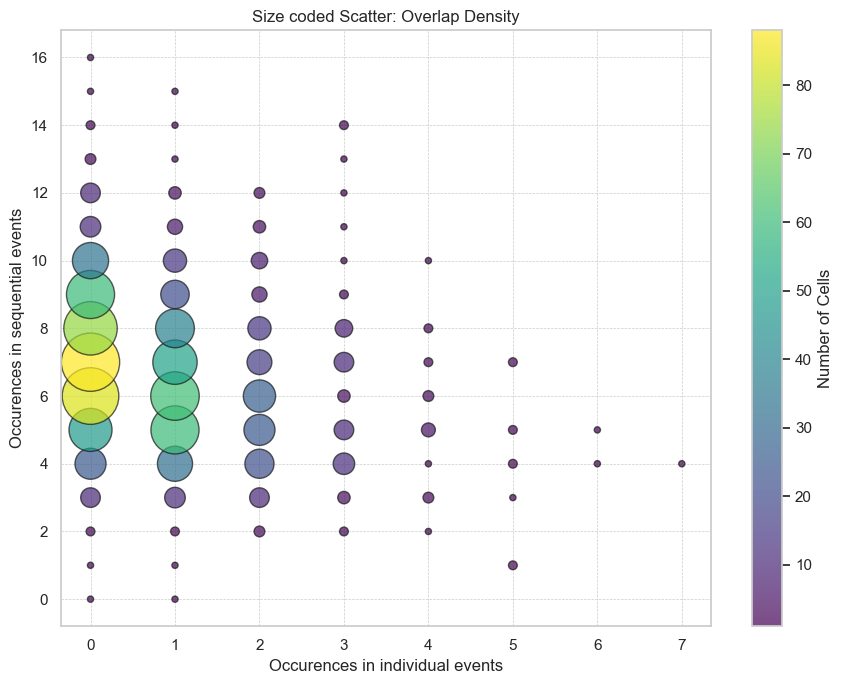

In [ ]:
plot_scatter_size_coded(
    df=cells,
    x_col="Occurences in individual events",
    y_col="Occurences in sequential events",
    size_scale=20,
    figsize=(9, 7)
)

## CELLS MOTION

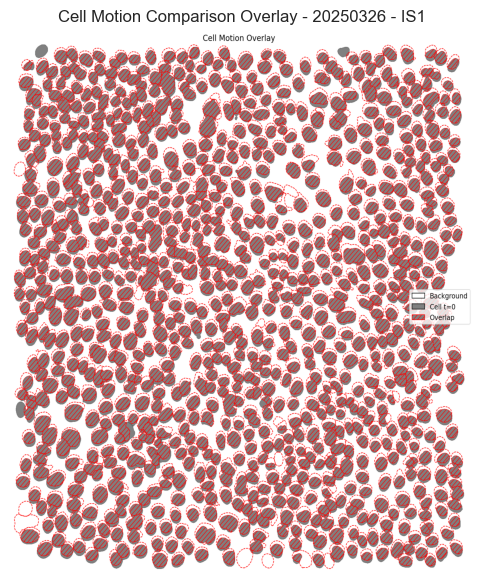

Number of cells:
- Hoechst image taken at t=0: 985
- Hoechst image taken at t=1801: 999
- Number of cells difference: absolute 14, relative 1.41%
Pixel-level cell segmentation:
- Total number of pixels in image: 4194304
- Pixels segmented as cell at t=0: 1166809
- Pixels segmented as cell at t=1801: 1288137
- Overlapping pixels between t=0 and t=1801: 937179(76.35% of total)
- Pixels exclusive to t=0: 229630 (19.68% of total)
- Pixels exclusive to t=1801: 350958 (27.25% of total)


In [ ]:
visualize_image(
    image_source=control_paths,
    image_name="cell-motion/cellmotion_comparison_overlay.png",
    title="Cell Motion Comparison Overlay",
    figsize=(5, 6)
)

cm = cellmotion.set_index("Metric")["Value"]
print("Number of cells:")
print(f"- Hoechst image taken at t=0: {int(cm['n_cells_t0'])}")
print(f"- Hoechst image taken at t=1801: {int(cm['n_cells_t1'])}")
print(
    f"- Number of cells difference: absolute {int(cm['cell_count_diff_abs'])}, "
    f"relative {cm['cell_count_diff_rel'] * 100:.2f}%"
)
print("Pixel-level cell segmentation:")
print(f"- Total number of pixels in image: {int(cm['total_pixels'])}")
print(f"- Pixels segmented as cell at t=0: {int(cm['pixels_t0'])}")
print(f"- Pixels segmented as cell at t=1801: {int(cm['pixels_t1'])}")
print(f"- Overlapping pixels between t=0 and t=1801: {int(cm['pixels_both'])}"
      f"({cm['pixels_both_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=0: {int(cm['pixels_only_t0'])} "
      f"({cm['pixels_only_t0_rel'] * 100:.2f}% of total)")
print(f"- Pixels exclusive to t=1801: {int(cm['pixels_only_t1'])} "
      f"({cm['pixels_only_t1_rel'] * 100:.2f}% of total)")
